In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
database = 'database.sqlite'
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print("Connection Successful",conn)
print(tables)

Connection Successful <sqlite3.Connection object at 0x109cf69d0>
    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE

In [4]:
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df_player_attr.shape

(183978, 42)

In [6]:
df_player_attr.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [7]:
df_player_attr=df_player_attr.dropna()
df_player_attr.shape

(180354, 42)

In [8]:
df_player_attr.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [9]:
df_player = pd.read_sql_query("SELECT * FROM Player", conn)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
df_player.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [11]:
df_player[df_player['player_name']=='Michael Carrick']

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
7329,7340,34944,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163


In [12]:
df_player_combined = pd.read_sql_query("SELECT * FROM Player_Attributes as pa, Player as p WHERE pa.player_api_id=p.player_api_id", conn)

df_player_combined.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_kicking,gk_positioning,gk_reflexes,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,10.0,8.0,8.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,9.0,7.0,7.0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [13]:
df_player_combined = pd.read_sql_query("SELECT * FROM Player_Attributes LEFT OUTER JOIN Player using (player_api_id)", conn)

# df_player_combined.to_csv('Player_combined.csv')

df_player_combined.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [14]:
df_player_combined.tail()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,20.0,84.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,20.0,73.0,20.0,20.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,...,9.0,78.0,7.0,15.0,11075,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [15]:
df_player_combined.shape

(183978, 48)

In [16]:
df_player_combined.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [17]:
df_player_combined=df_player_combined.dropna()
df_player_combined.shape

(180354, 48)

In [18]:
df_player_combined.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [19]:
df_carrick = df_player_combined[df_player_combined['player_name']=='Michael Carrick']

df_carrick.shape

(31, 48)

In [20]:
df_carrick.head(31)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
122729,122730,21146,34944,2016-03-24 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122730,122731,21146,34944,2016-03-03 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122731,122732,21146,34944,2016-02-25 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122732,122733,21146,34944,2016-01-07 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122733,122734,21146,34944,2015-11-26 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122734,122735,21146,34944,2015-09-21 00:00:00,80.0,80.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122735,122736,21146,34944,2015-03-27 00:00:00,79.0,79.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122736,122737,21146,34944,2014-12-19 00:00:00,79.0,79.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122737,122738,21146,34944,2014-10-02 00:00:00,79.0,79.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122738,122739,21146,34944,2014-09-18 00:00:00,79.0,79.0,right,low,medium,72.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163


In [21]:
df_carrick = df_carrick[df_carrick['date'].str.contains('2010|2011')]
df_carrick

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
122752,122753,21146,34944,2011-08-30 00:00:00,82.0,82.0,right,medium,high,79.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122753,122754,21146,34944,2011-02-22 00:00:00,81.0,86.0,right,medium,high,79.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163
122754,122755,21146,34944,2010-08-30 00:00:00,81.0,86.0,right,medium,high,79.0,...,12.0,11.0,15.0,9.0,7340,Michael Carrick,21146,1981-07-28 00:00:00,187.96,163


In [22]:
df_vidic = df_player_combined[df_player_combined['player_name']=='Nemanja Vidic']

df_vidic

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
131124,131125,140601,30865,2016-01-14 00:00:00,81.0,81.0,right,low,medium,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131125,131126,140601,30865,2015-11-26 00:00:00,82.0,82.0,right,low,medium,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131126,131127,140601,30865,2015-11-06 00:00:00,83.0,83.0,right,low,medium,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131127,131128,140601,30865,2015-09-21 00:00:00,83.0,83.0,right,low,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131128,131129,140601,30865,2015-03-20 00:00:00,82.0,82.0,right,low,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131129,131130,140601,30865,2015-03-06 00:00:00,83.0,83.0,right,low,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131130,131131,140601,30865,2014-10-31 00:00:00,83.0,83.0,right,low,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131131,131132,140601,30865,2014-10-24 00:00:00,83.0,83.0,right,low,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131132,131133,140601,30865,2014-10-02 00:00:00,83.0,83.0,right,medium,high,34.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131133,131134,140601,30865,2014-09-18 00:00:00,83.0,83.0,right,medium,high,39.0,...,4.0,13.0,7.0,5.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194


In [23]:
df_vidic = df_vidic[df_vidic['date'].str.contains('2010|2011')]
df_vidic

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
131143,131144,140601,30865,2011-08-30 00:00:00,89.0,91.0,right,medium,high,40.0,...,5.0,14.0,8.0,6.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131144,131145,140601,30865,2011-02-22 00:00:00,87.0,90.0,right,medium,high,40.0,...,5.0,14.0,8.0,6.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131145,131146,140601,30865,2010-08-30 00:00:00,87.0,90.0,right,medium,high,40.0,...,5.0,14.0,8.0,6.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194
131146,131147,140601,30865,2010-02-22 00:00:00,88.0,90.0,right,medium,high,40.0,...,23.0,62.0,23.0,23.0,7846,Nemanja Vidic,140601,1981-10-21 00:00:00,190.5,194


In [24]:
df_rooney = df_player_combined[df_player_combined['player_name']=='Wayne Rooney']
df_rooney = df_rooney[df_rooney['date'].str.contains('2010|2011')]
df_rooney

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
178968,178969,54050,30829,2011-08-30 00:00:00,90.0,92.0,right,high,high,79.0,...,11.0,13.0,8.0,7.0,10749,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183
178969,178970,54050,30829,2011-02-22 00:00:00,87.0,91.0,right,high,high,79.0,...,11.0,13.0,8.0,7.0,10749,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183
178970,178971,54050,30829,2010-08-30 00:00:00,88.0,91.0,right,high,high,80.0,...,11.0,13.0,8.0,7.0,10749,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183
178971,178972,54050,30829,2010-02-22 00:00:00,89.0,92.0,right,high,high,80.0,...,21.0,86.0,21.0,21.0,10749,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183


In [25]:
df_chicharito = df_player_combined[df_player_combined['player_name']=='Javier Hernandez']
df_chicharito = df_chicharito[df_chicharito['date'].str.contains('2010|2011')]
df_chicharito

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
78571,78572,178224,70409,2011-08-30 00:00:00,82.0,85.0,right,medium,medium,62.0,...,12.0,9.0,12.0,11.0,4733,Javier Hernandez,178224,1988-06-01 00:00:00,175.26,161
78572,78573,178224,70409,2011-02-22 00:00:00,77.0,87.0,right,medium,medium,62.0,...,12.0,9.0,12.0,11.0,4733,Javier Hernandez,178224,1988-06-01 00:00:00,175.26,161
78573,78574,178224,70409,2010-08-30 00:00:00,79.0,87.0,right,medium,medium,65.0,...,12.0,9.0,12.0,11.0,4733,Javier Hernandez,178224,1988-06-01 00:00:00,175.26,161
78574,78575,178224,70409,2010-02-22 00:00:00,71.0,76.0,left,medium,medium,63.0,...,20.0,48.0,20.0,20.0,4733,Javier Hernandez,178224,1988-06-01 00:00:00,175.26,161


In [26]:
df_vidic_req = df_vidic[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']]
df_vidic_req

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,aggression,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
131143,40.0,37.0,92.0,69.0,41.0,48.0,43.0,48.0,62.0,67.0,...,92.0,28.0,92.0,83.0,26.0,56.0,62.0,91.0,94.0,86.0
131144,40.0,41.0,91.0,74.0,41.0,48.0,43.0,48.0,62.0,67.0,...,92.0,35.0,92.0,83.0,50.0,63.0,62.0,90.0,94.0,85.0
131145,40.0,41.0,91.0,73.0,41.0,48.0,43.0,48.0,62.0,64.0,...,92.0,35.0,92.0,85.0,44.0,63.0,62.0,90.0,94.0,85.0
131146,40.0,41.0,94.0,73.0,41.0,48.0,43.0,48.0,62.0,64.0,...,92.0,35.0,92.0,86.0,89.0,63.0,78.0,90.0,94.0,85.0


In [27]:
df_vidic_req.mean()

crossing              40.00
finishing             40.00
heading_accuracy      92.00
short_passing         72.25
volleys               41.00
dribbling             48.00
curve                 43.00
free_kick_accuracy    48.00
long_passing          62.00
ball_control          65.50
acceleration          68.75
sprint_speed          70.00
agility               51.50
reactions             77.50
balance               74.75
shot_power            60.00
jumping               91.50
stamina               71.75
strength              92.25
long_shots            33.25
aggression            92.00
long_shots            33.25
aggression            92.00
interceptions         84.25
positioning           52.25
vision                61.25
penalties             66.00
marking               90.25
standing_tackle       94.00
sliding_tackle        85.25
dtype: float64

Text(0.5,1,'Vidic')

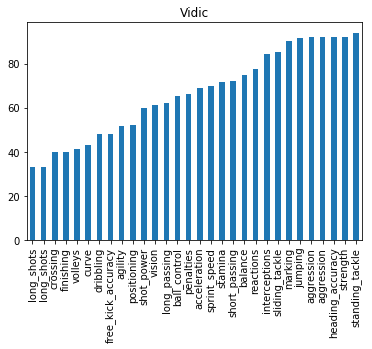

In [28]:
# dfObj = dfObj.sort_values(by='b', axis=1, ascending=False)
# df_vidic_req.mean().plot.bar()
df_vidic_req.mean().sort_values().plot.bar()
plt.title('Vidic')

In [29]:
df_carrick_req = df_carrick[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']]
df_carrick_req.mean()

crossing              79.000000
finishing             63.000000
heading_accuracy      73.000000
short_passing         86.000000
volleys               67.000000
dribbling             73.000000
curve                 64.000000
free_kick_accuracy    77.000000
long_passing          85.666667
ball_control          81.333333
acceleration          67.333333
sprint_speed          71.000000
agility               58.000000
reactions             80.000000
balance               73.000000
shot_power            80.666667
jumping               72.000000
stamina               81.666667
strength              77.666667
long_shots            81.666667
aggression            74.000000
long_shots            81.666667
aggression            74.000000
interceptions         88.000000
positioning           74.000000
vision                85.000000
penalties             78.000000
marking               80.333333
standing_tackle       81.666667
sliding_tackle        78.666667
dtype: float64

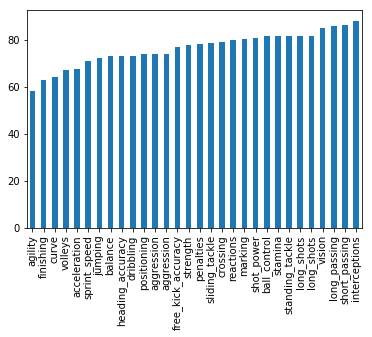

In [30]:
df_carrick_req.mean().sort_values().plot.bar()

In [31]:
df_rooney_req = df_rooney[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']]
df_rooney_req.mean()

crossing              79.50
finishing             92.00
heading_accuracy      82.00
short_passing         85.50
volleys               89.00
dribbling             84.75
curve                 82.50
free_kick_accuracy    79.25
long_passing          83.25
ball_control          89.50
acceleration          84.50
sprint_speed          85.00
agility               80.00
reactions             87.50
balance               85.00
shot_power            91.00
jumping               79.00
stamina               87.25
strength              89.25
long_shots            84.50
aggression            92.50
long_shots            84.50
aggression            92.50
interceptions         59.25
positioning           90.50
vision                88.00
penalties             86.50
marking               43.75
standing_tackle       49.50
sliding_tackle        40.00
dtype: float64

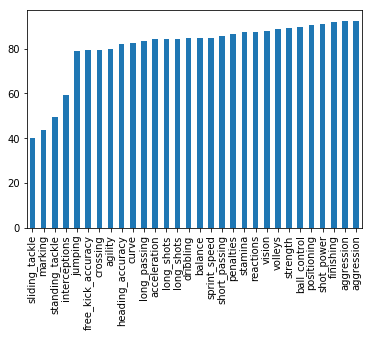

In [32]:
df_rooney_req.mean().sort_values().plot.bar()

In [33]:
df_chicharito_req = df_chicharito[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle']]
df_chicharito_req.mean()

crossing              63.00
finishing             81.00
heading_accuracy      77.50
short_passing         67.50
volleys               73.00
dribbling             72.75
curve                 68.50
free_kick_accuracy    49.50
long_passing          54.00
ball_control          76.75
acceleration          84.00
sprint_speed          84.00
agility               81.00
reactions             79.75
balance               70.50
shot_power            74.50
jumping               83.50
stamina               71.50
strength              65.00
long_shots            69.50
aggression            54.00
long_shots            69.50
aggression            54.00
interceptions         44.50
positioning           80.00
vision                74.25
penalties             71.75
marking               21.50
standing_tackle       27.25
sliding_tackle        19.00
dtype: float64

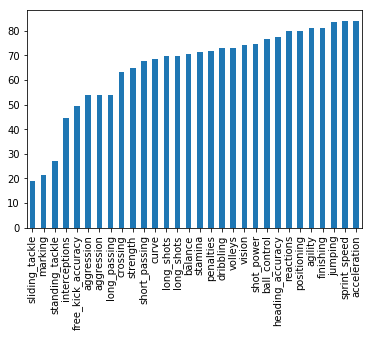

In [34]:
df_chicharito_req.mean().sort_values().plot.bar()

In [35]:
df_mufc = pd.concat([df_chicharito_req.mean(), df_rooney_req.mean(), df_carrick_req.mean(), df_vidic_req.mean()])

df_mufc.shape

(120,)

In [36]:
df_chicharito_req_mean = df_chicharito_req.mean()
df_rooney_req_mean = df_rooney_req.mean()
df_carrick_req_mean = df_carrick_req.mean()
df_vidic_req_mean = df_vidic_req.mean()
# df_chicharito_req_mean['mu']='chicharito'
# df_rooney_req_mean['mu']='rooney'
# df_carrick_req_mean['mu']='carrick'
# df_vidic_req_mean['mu']='vidic'
# res=pd.concat([df_chicharito_req_mean, df_rooney_req_mean, df_carrick_req_mean, df_vidic_req_mean])
# sns.barplot(x='x',y='y',data=res,hue='mu')
# plt.show()
# df_chicharito_req.mean().plot.bar()
# df_rooney_req.mean().plot.bar()
# df_carrick_req.mean().plot.bar()
# df_vidic_req.mean().plot.bar()
# plt.show()

In [37]:
# df_chicharito_req_mean
res=pd.concat([df_chicharito_req_mean, df_rooney_req_mean, df_carrick_req_mean, df_vidic_req_mean], axis=1)
res.columns = ['Chicharito', 'Rooney', 'Carrick', 'Vidic']
res

,Chicharito,Rooney,Carrick,Vidic
crossing,63.00,79.50,79.000000,40.00
finishing,81.00,92.00,63.000000,40.00
heading_accuracy,77.50,82.00,73.000000,92.00
short_passing,67.50,85.50,86.000000,72.25
volleys,73.00,89.00,67.000000,41.00
dribbling,72.75,84.75,73.000000,48.00
curve,68.50,82.50,64.000000,43.00
free_kick_accuracy,49.50,79.25,77.000000,48.00
long_passing,54.00,83.25,85.666667,62.00
ball_control,76.75,89.50,81.333333,65.50


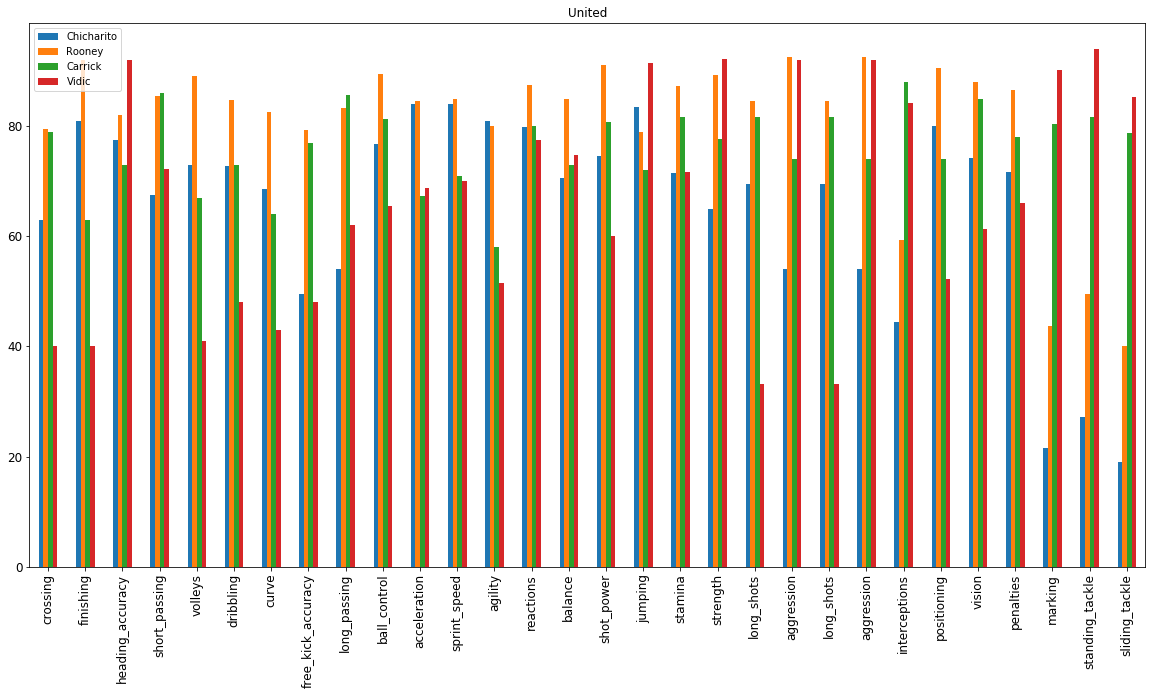

In [38]:
ax = res.plot(kind='bar', title ="United", figsize=(20, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
plt.show()

In [39]:
res_dummy=pd.concat([df_chicharito_req_mean, df_rooney_req_mean, df_carrick_req_mean, df_vidic_req_mean], axis=1)
res_dummy.columns = ['Chicharito', 'Rooney', 'Carrick', 'Vidic']
df_avg = res_dummy.mean(axis=1)

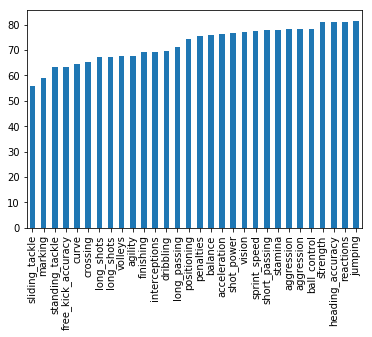

In [40]:
df_avg.sort_values().plot.bar()

In [68]:
df_mu_squad = df_player_combined[df_player_combined['player_name'].str.contains('Nemanja Vidic|Michael Carrick|Gary Neville|Patrice Evra|Owen Hargreaves|Rio Ferdinand|Wes Brown|Michael Owen|Dimitar Berbatov|Wayne Rooney|Ryan Giggs|Chris Smalling|Ji-Sung Park|Javier Hernandez|Nemanja Vidic|Michael Carrick|Paul Scholes|Danny Welbeck|Jonny Evans|Darren Fletcher|Antonio Valencia|Gabriel Obertan')]
df_mu_squad

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
15901,15902,167905,35327,2016-05-05 00:00:00,75.0,75.0,right,high,high,82.0,...,11.0,10.0,7.0,7.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15902,15903,167905,35327,2016-04-28 00:00:00,75.0,75.0,right,high,high,82.0,...,11.0,10.0,7.0,7.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15903,15904,167905,35327,2016-01-07 00:00:00,78.0,78.0,right,high,high,82.0,...,11.0,10.0,7.0,7.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15904,15905,167905,35327,2015-09-21 00:00:00,79.0,79.0,right,medium,high,84.0,...,11.0,10.0,7.0,7.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15905,15906,167905,35327,2015-03-13 00:00:00,80.0,80.0,right,medium,high,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15906,15907,167905,35327,2015-02-20 00:00:00,80.0,80.0,right,high,medium,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15907,15908,167905,35327,2015-01-09 00:00:00,80.0,80.0,right,medium,high,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15908,15909,167905,35327,2014-09-18 00:00:00,80.0,80.0,right,medium,high,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15909,15910,167905,35327,2014-04-11 00:00:00,81.0,81.0,right,medium,high,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15910,15911,167905,35327,2014-03-28 00:00:00,81.0,81.0,right,medium,high,83.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172


In [74]:
df_mu_squad_10_11 = df_mu_squad[df_mu_squad['date'].str.contains('2010|2011')]
df_mu_squad_10_11

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id,player_name,player_fifa_api_id,birthday,height,weight
15923,15924,167905,35327,2011-08-30 00:00:00,83.0,84.0,right,high,medium,86.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15924,15925,167905,35327,2011-02-22 00:00:00,81.0,87.0,right,high,medium,88.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15925,15926,167905,35327,2010-08-30 00:00:00,83.0,87.0,right,high,medium,88.0,...,10.0,9.0,6.0,6.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
15926,15927,167905,35327,2010-02-22 00:00:00,82.0,84.0,right,high,medium,86.0,...,22.0,61.0,22.0,22.0,920,Antonio Valencia,167905,1985-08-04 00:00:00,180.34,172
28765,28766,189881,165823,2011-08-30 00:00:00,77.0,85.0,right,medium,medium,39.0,...,14.0,15.0,14.0,14.0,1728,Chris Smalling,189881,1989-11-22 00:00:00,193.04,198
28766,28767,189881,165823,2011-02-22 00:00:00,77.0,86.0,right,medium,medium,54.0,...,14.0,15.0,14.0,14.0,1728,Chris Smalling,189881,1989-11-22 00:00:00,193.04,198
28767,28768,189881,165823,2010-08-30 00:00:00,76.0,83.0,right,medium,medium,55.0,...,14.0,15.0,14.0,14.0,1728,Chris Smalling,189881,1989-11-22 00:00:00,193.04,198
28768,28769,189881,165823,2010-02-22 00:00:00,77.0,83.0,right,medium,medium,55.0,...,22.0,65.0,22.0,22.0,1728,Chris Smalling,189881,1989-11-22 00:00:00,193.04,198
37678,37679,186146,113836,2011-08-30 00:00:00,76.0,84.0,right,medium,medium,70.0,...,9.0,5.0,11.0,15.0,2247,Danny Welbeck,186146,1990-11-26 00:00:00,185.42,161
37679,37680,186146,113836,2011-02-22 00:00:00,76.0,84.0,right,medium,medium,69.0,...,9.0,5.0,11.0,15.0,2247,Danny Welbeck,186146,1990-11-26 00:00:00,185.42,161


In [83]:
# df_mu_squad_10_11.to_csv('Mu_squad.csv')
df_mu_req = df_mu_squad_10_11[['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'player_name']]
df_mu_req 

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,player_name
15923,86.0,67.0,68.0,77.0,69.0,83.0,80.0,65.0,64.0,81.0,...,65.0,77.0,21.0,80.0,81.0,71.0,19.0,23.0,20.0,Antonio Valencia
15924,88.0,75.0,61.0,73.0,67.0,82.0,75.0,68.0,61.0,86.0,...,81.0,78.0,51.0,84.0,82.0,62.0,38.0,51.0,44.0,Antonio Valencia
15925,88.0,75.0,61.0,73.0,67.0,86.0,75.0,68.0,61.0,86.0,...,81.0,78.0,51.0,84.0,82.0,62.0,38.0,51.0,44.0,Antonio Valencia
15926,86.0,75.0,61.0,72.0,67.0,86.0,75.0,68.0,61.0,84.0,...,81.0,78.0,71.0,71.0,82.0,77.0,45.0,53.0,44.0,Antonio Valencia
28765,39.0,15.0,78.0,68.0,23.0,50.0,25.0,16.0,46.0,59.0,...,10.0,77.0,78.0,21.0,48.0,42.0,78.0,82.0,77.0,Chris Smalling
28766,54.0,23.0,78.0,72.0,43.0,50.0,25.0,46.0,65.0,64.0,...,35.0,77.0,78.0,40.0,61.0,52.0,76.0,79.0,77.0,Chris Smalling
28767,55.0,23.0,76.0,66.0,33.0,31.0,25.0,46.0,65.0,63.0,...,35.0,77.0,74.0,40.0,65.0,52.0,78.0,76.0,75.0,Chris Smalling
28768,55.0,23.0,76.0,66.0,33.0,31.0,25.0,46.0,65.0,66.0,...,35.0,77.0,78.0,77.0,65.0,76.0,78.0,79.0,75.0,Chris Smalling
37678,70.0,78.0,79.0,73.0,69.0,77.0,60.0,64.0,57.0,74.0,...,71.0,59.0,21.0,76.0,68.0,78.0,13.0,35.0,31.0,Danny Welbeck
37679,69.0,78.0,72.0,70.0,69.0,76.0,60.0,64.0,57.0,76.0,...,71.0,70.0,33.0,76.0,68.0,64.0,37.0,41.0,38.0,Danny Welbeck


In [99]:
df_mu_req = df_mu_req.loc[:,~df_mu_req.columns.duplicated()]

In [102]:
df_mu_graph = df_mu_req.groupby(['player_name'])['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle'].mean()
df_mu_graph

,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,aggression,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
player_name,,,,,,,,,,,,,,,,,,,,,
Antonio Valencia,87.00,73.00,62.750000,73.750000,67.500000,84.250000,76.250000,67.25,61.750000,84.250000,...,77.750000,77.000000,77.750000,48.500000,79.750000,81.750000,68.000000,35.000000,44.500000,38.000000
Chris Smalling,50.75,21.00,77.000000,68.000000,33.000000,40.500000,25.000000,38.50,60.250000,63.000000,...,77.000000,28.750000,77.000000,77.000000,44.500000,59.750000,55.500000,77.500000,79.000000,76.000000
Danny Welbeck,67.50,73.75,69.500000,66.000000,69.000000,74.000000,58.500000,64.25,47.750000,70.750000,...,51.500000,72.250000,51.500000,39.500000,75.750000,62.500000,67.000000,22.000000,29.750000,26.250000
Darren Fletcher,79.75,71.50,85.500000,85.500000,62.750000,72.750000,60.250000,46.00,83.500000,80.000000,...,89.250000,76.500000,89.250000,87.750000,78.750000,80.000000,63.000000,87.000000,83.000000,77.000000
Dimitar Berbatov,76.75,87.50,84.250000,84.500000,89.500000,83.000000,74.750000,68.75,71.000000,87.750000,...,55.500000,74.250000,55.500000,44.500000,81.750000,83.250000,76.250000,16.750000,21.500000,16.750000
Gabriel Obertan,73.25,61.50,44.000000,75.000000,59.000000,78.500000,52.000000,38.00,63.000000,76.250000,...,69.500000,53.000000,69.500000,48.750000,66.500000,70.250000,62.750000,43.000000,36.000000,24.000000
Javier Hernandez,63.00,81.00,77.500000,67.500000,73.000000,72.750000,68.500000,49.50,54.000000,76.750000,...,54.000000,69.500000,54.000000,44.500000,80.000000,74.250000,71.750000,21.500000,27.250000,19.000000
Ji-Sung Park,77.00,74.75,68.000000,78.000000,77.000000,82.500000,65.000000,53.00,63.000000,80.750000,...,59.750000,66.250000,59.750000,61.750000,83.500000,77.250000,73.750000,52.750000,52.250000,44.000000
Jonny Evans,59.00,27.00,78.000000,74.000000,45.000000,38.000000,31.000000,24.00,54.000000,65.000000,...,76.750000,24.000000,76.750000,75.500000,46.250000,59.000000,42.000000,77.250000,79.000000,78.000000


In [103]:
df_mu_graph.to_csv('Mu_squad.csv')

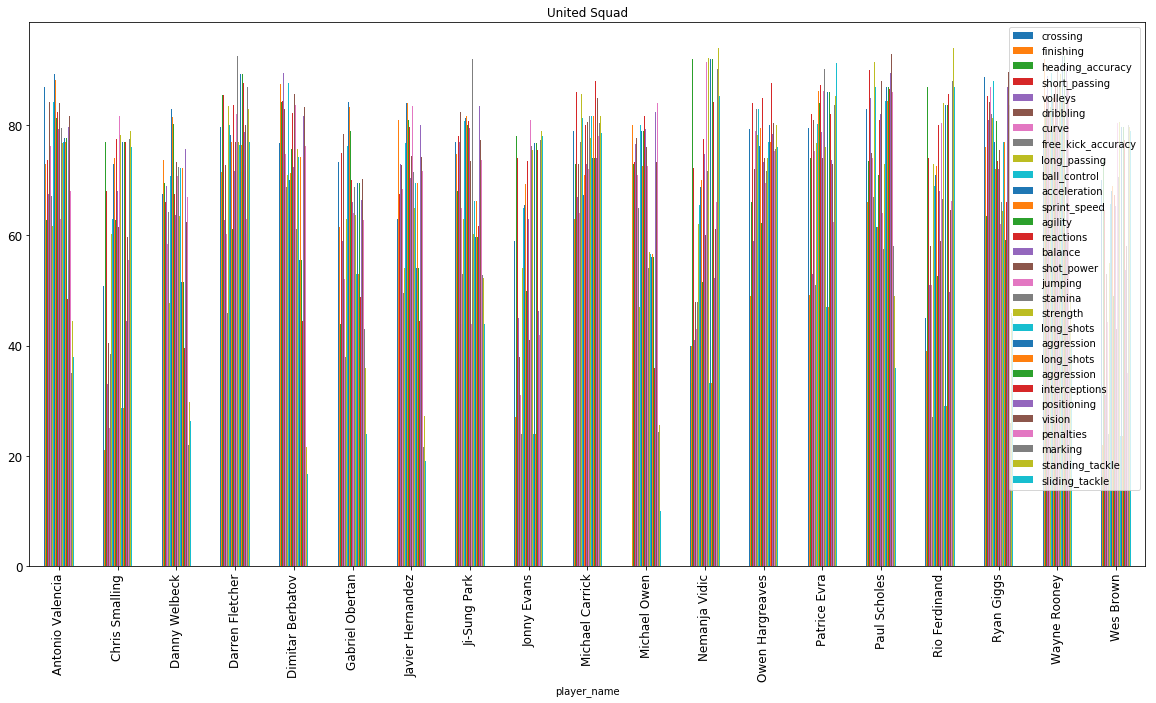

In [104]:
ax = df_mu_graph.plot(kind='bar', title ="United Squad", figsize=(20, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)
plt.show()

# Use altair to make above graph interactive